# COMP 9517 Lab1

Written by: Borong Xu 

Environment:
- Python 3.11.10  
- opencv-python 4.10  
- matplotlib 3.9.2  
- numpy 2.1.3  


### Library import

In [2]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
Task1_path = 'COMP9517_25T1_Lab1_Images/Task1.jpg'
Task2_path = 'COMP9517_25T1_Lab1_Images/Task2.jpg'
Task3_path = 'COMP9517_25T1_Lab1_Images/Task3.jpg'

## Task1

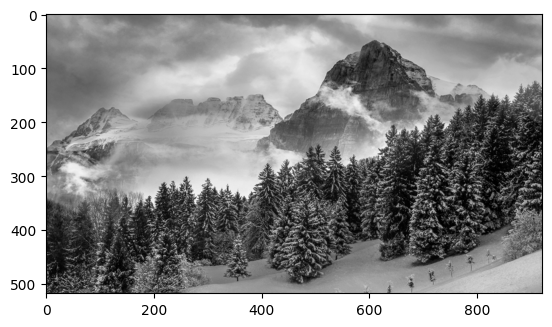

In [3]:
# Import the image
img = cv.imread(Task1_path, cv.IMREAD_COLOR)
org_img = img.copy()
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

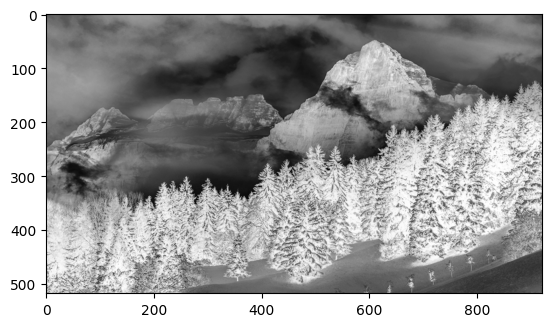

In [4]:
# Intensity inversion
img = 255 - img
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

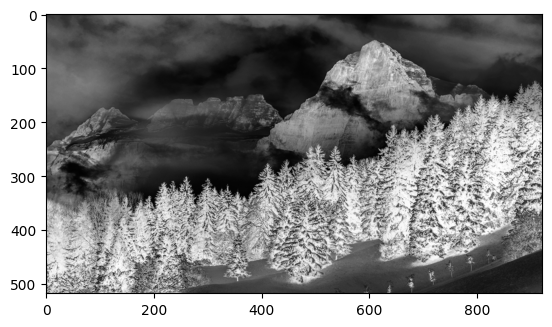

In [5]:
# Gamma correction
gamma = 1.5
img = pow(img / 255.0, gamma) * 255.0
img = img.astype(np.uint8)

plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

Text(0.5, 1.0, 'Output Image')

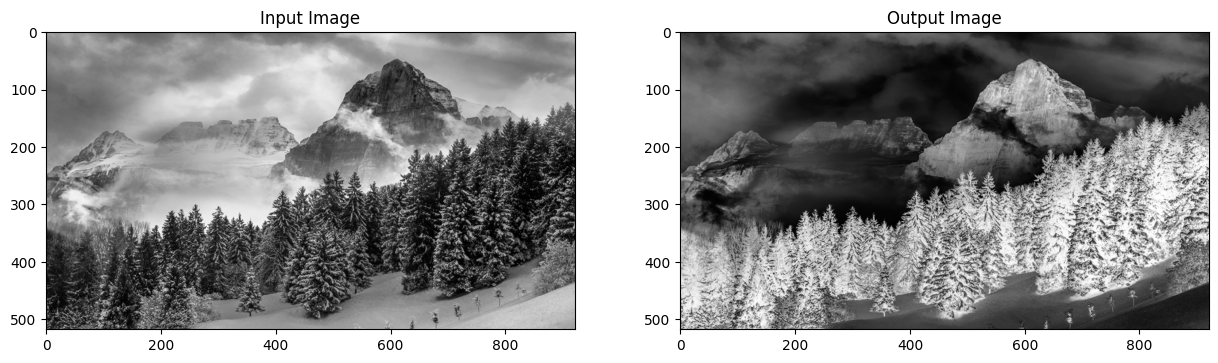

In [6]:
# Side by side comparison
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].imshow(cv.cvtColor(org_img, cv.COLOR_BGR2RGB))
axs[0].set_title('Input Image')
axs[1].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
axs[1].set_title('Output Image')

## Task2

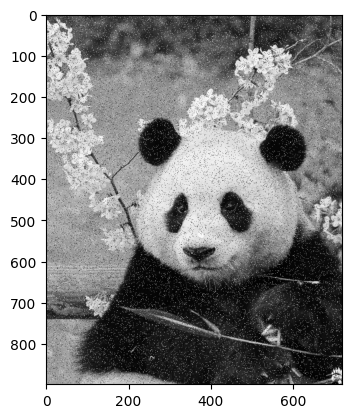

In [7]:
# Import the image
img = cv.imread(Task2_path, cv.IMREAD_COLOR)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

Text(0.5, 1.0, 'Median Filter')

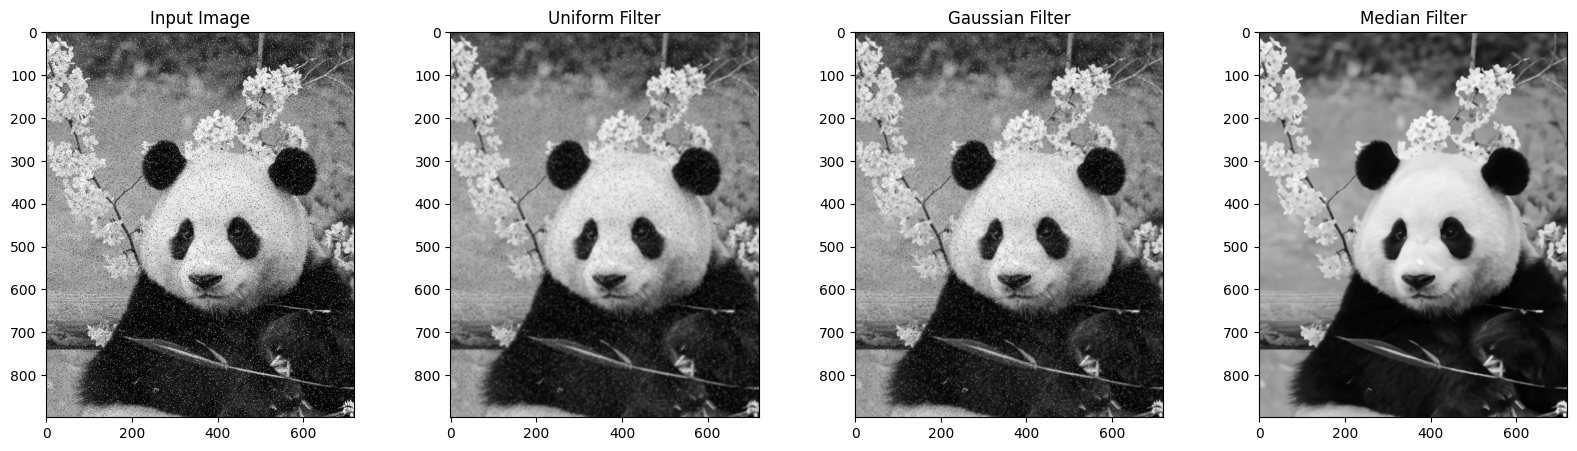

In [8]:
# Side by side comparison of different filters
fig, axs = plt.subplots(1, 4, figsize=(20, 5))
axs[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
axs[0].set_title('Input Image')
axs[1].imshow(cv.cvtColor(cv.blur(img, (5, 5)), cv.COLOR_BGR2RGB))
axs[1].set_title('Uniform Filter')
axs[2].imshow(cv.cvtColor(cv.GaussianBlur(img, (5, 5), 0), cv.COLOR_BGR2RGB))
axs[2].set_title('Gaussian Filter')
axs[3].imshow(cv.cvtColor(cv.medianBlur(img, 5), cv.COLOR_BGR2RGB))
axs[3].set_title('Median Filter')

Text(0.5, 1.0, 'Median Filter 7x7')

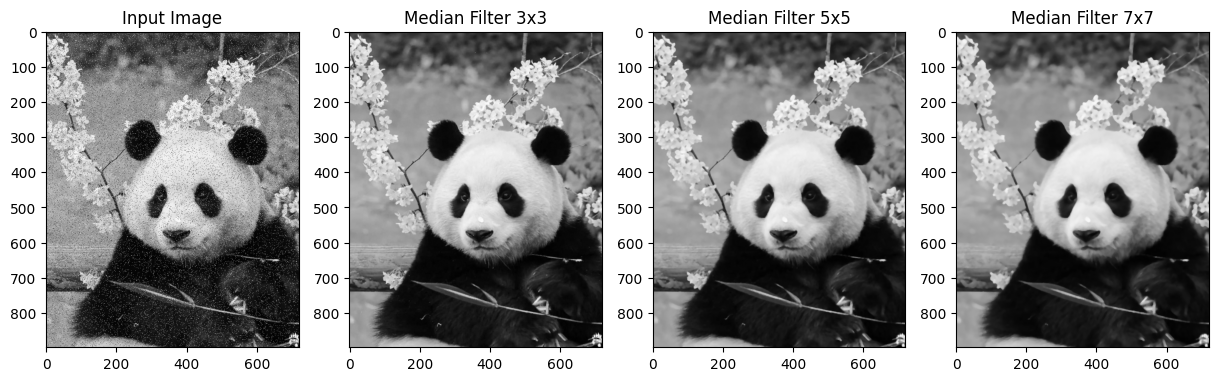

In [9]:
# Comparison of different size of Median filter
fig, axs = plt.subplots(1, 4, figsize=(15, 5))
axs[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
axs[0].set_title('Input Image')
axs[1].imshow(cv.cvtColor(cv.medianBlur(img, 3), cv.COLOR_BGR2RGB))
axs[1].set_title('Median Filter 3x3')
axs[2].imshow(cv.cvtColor(cv.medianBlur(img, 5), cv.COLOR_BGR2RGB))
axs[2].set_title('Median Filter 5x5')
axs[3].imshow(cv.cvtColor(cv.medianBlur(img, 7), cv.COLOR_BGR2RGB))
axs[3].set_title('Median Filter 7x7')

Text(0.5, 1.0, 'Output Image')

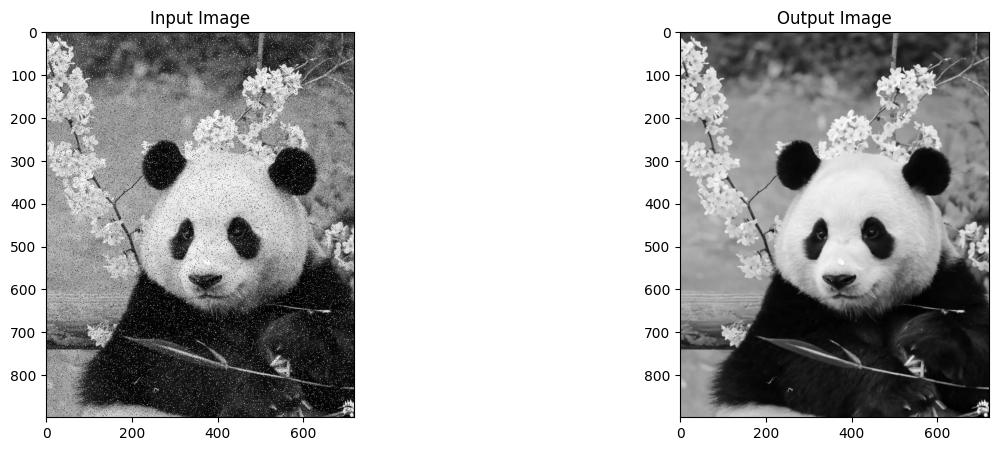

In [10]:
# Side by side comparison
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
axs[0].set_title('Input Image')
axs[1].imshow(cv.cvtColor(cv.medianBlur(img, 3), cv.COLOR_BGR2RGB))
axs[1].set_title('Output Image')

### Explaination
Among the three output images, median filter has the best performance in removing the noise. The noise of the original image is more like salt and pepper noises, which can be easily removed by median filter. 

Also, the Median filter can remove noises less than $\dfrac{n^2}{2}$， with different attemps of n, the noise can be removed by the smallest n. Thus, the median filter with a size of 3x3 is the best choice for this task.

## Task3

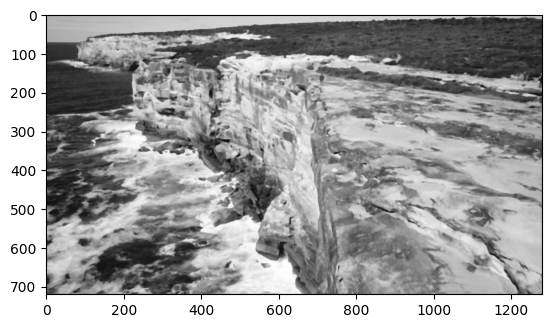

In [11]:
# Import the image
img = cv.imread(Task3_path, cv.IMREAD_COLOR)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

Text(0.5, 1.0, 'Laplacian Filter')

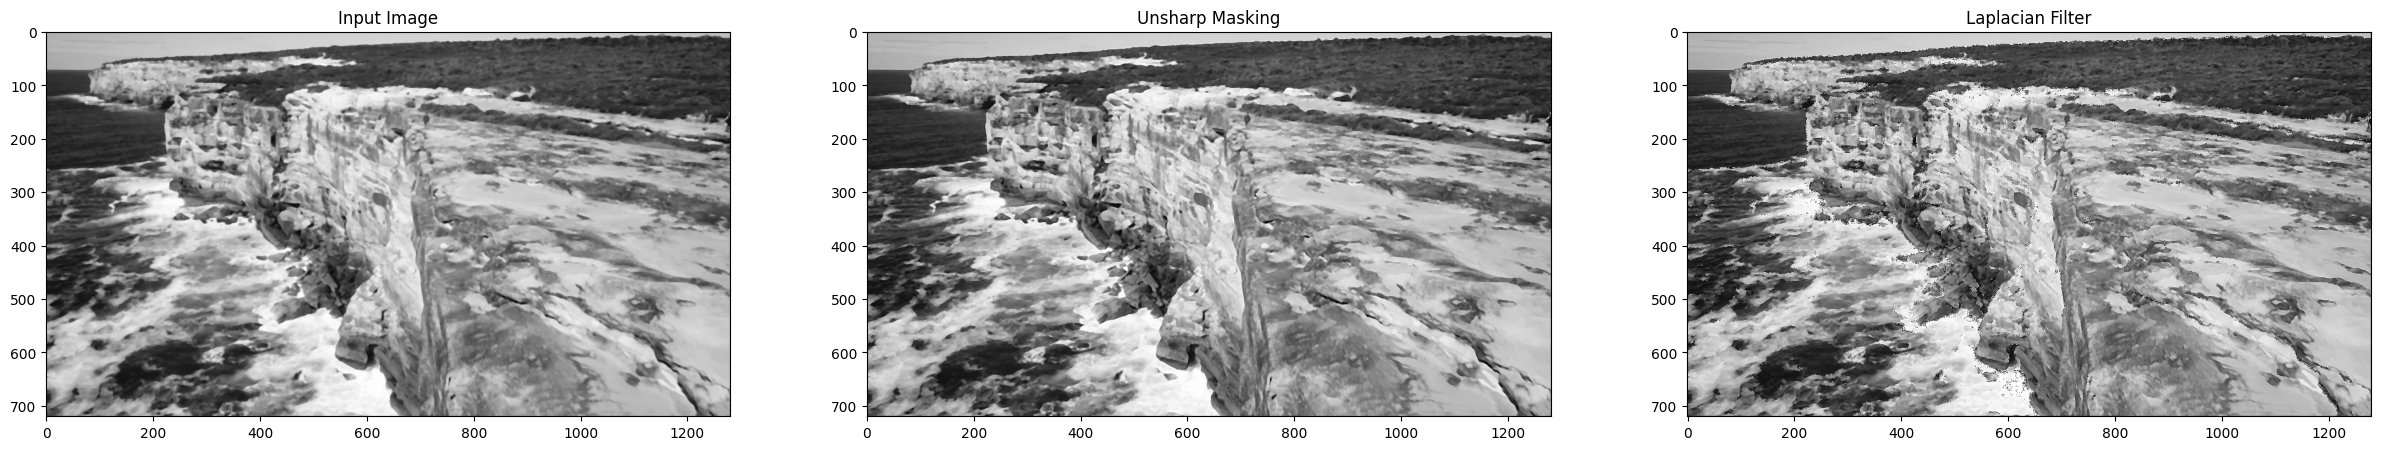

In [12]:
# Comparison of unsharp masking and laplacian filter
fig, axs = plt.subplots(1, 3, figsize=(30, 10))
axs[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
axs[0].set_title('Input Image')
axs[1].imshow(cv.cvtColor(cv.addWeighted(img, 2, cv.GaussianBlur(img, (5, 5), 0), -1, 0), cv.COLOR_BGR2RGB))
axs[1].set_title('Unsharp Masking')
axs[2].imshow(img - cv.cvtColor(cv.Laplacian(img, cv.CV_64F).astype(np.uint8), cv.COLOR_BGR2RGB))
axs[2].set_title('Laplacian Filter')

Text(0.5, 1.0, 'Output Image')

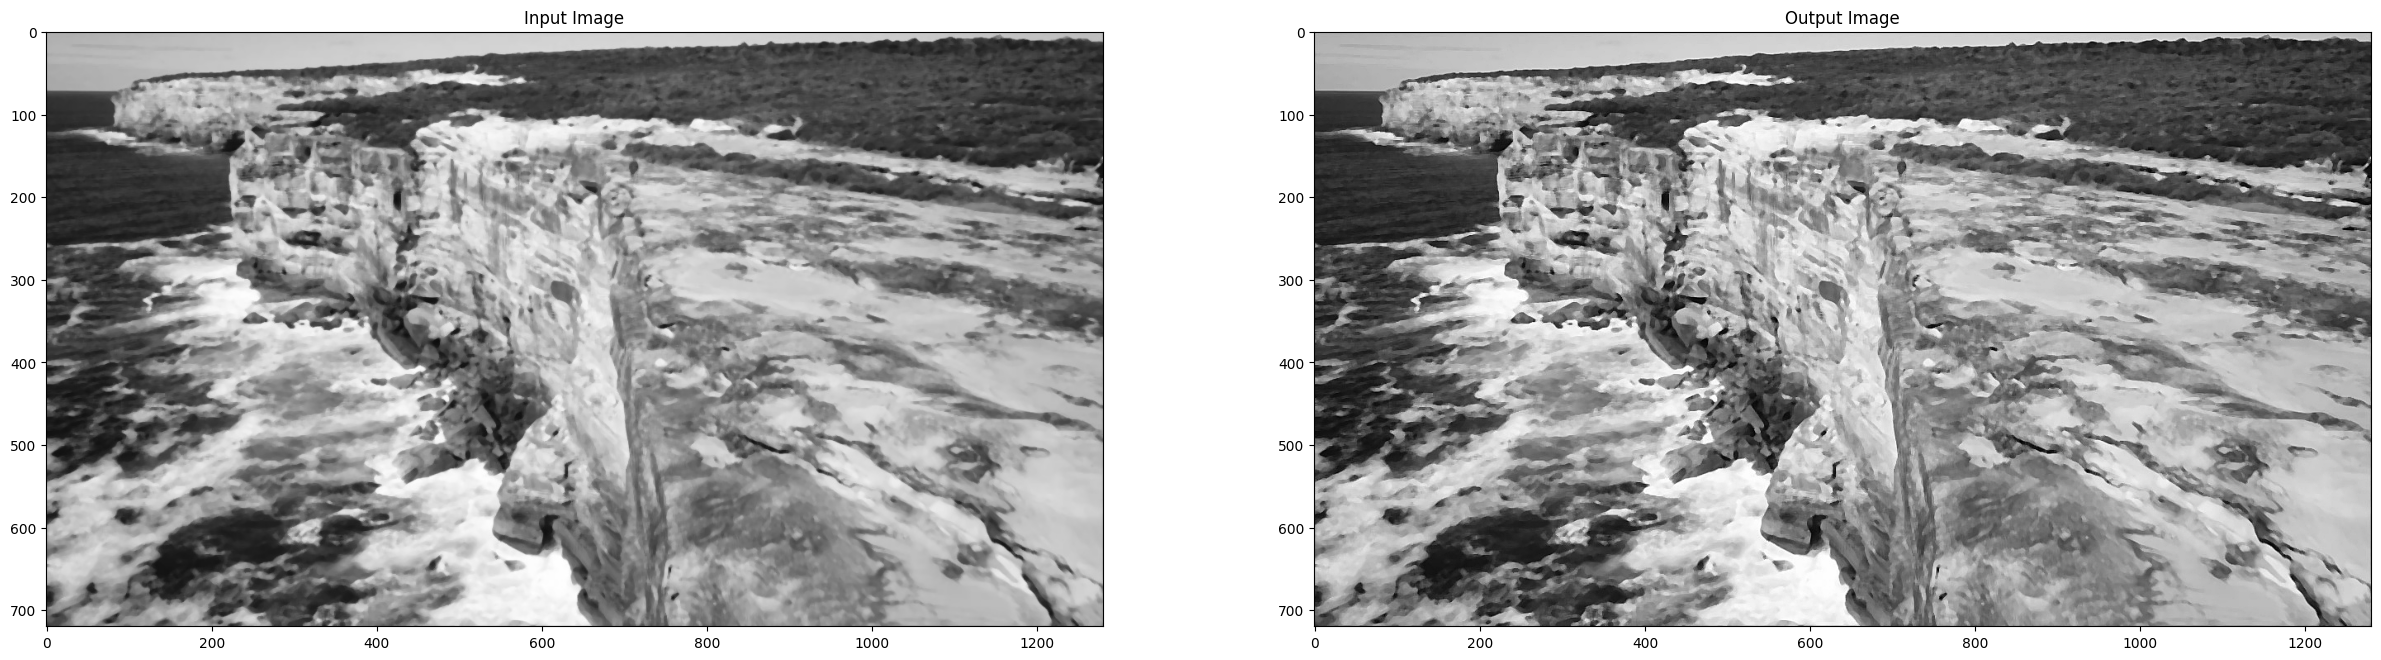

In [13]:
# Side by side comparison
fig, axs = plt.subplots(1, 2, figsize=(30, 10))
axs[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
axs[0].set_title('Input Image')
axs[1].imshow(cv.cvtColor(cv.addWeighted(img, 2.5, cv.GaussianBlur(img, (5, 5), 0), -1.5, 0), cv.COLOR_BGR2RGB))
axs[1].set_title('Output Image')

### Explanation

Unsharp Masking is suitable for this task, since it can enhance the image by adding the edges(or high frequency components) back to the original image. Resulting in sharper image.

The Gaussian filter can be tuned by the size of the kernel and also the weight between the original image and the blurred image. Using the formula $I_{\text{sharp}} = \alpha I_{\text{original}} - \beta I_{\text{blurred}}$, where $\alpha = \beta + 1$ according to lecture notes. The weight can be tuned to get the best result.

Meanwhile, the Laplacian filter take benefits in enhancing the contrast between the background and the object. Which does not apply to this task.

### Reference  
https://docs.opencv.org/3.4/d3/dc1/tutorial_basic_linear_transform.html  
https://docs.opencv.org/4.x/d4/d13/tutorial_py_filtering.html  
https://docs.opencv.org/3.4/d5/dc4/tutorial_adding_images.html  

Copyright: This notebook is provided as part of the COMP9517 Computer Vision course at UNSW Sydney. This notebook can be used, modified and shared for educational purposes.

Borong Xu  
The Hong Kong University of Science and Technology  
Program of Computer Engineering  
https://boring180.github.io/